#Exam One

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Importing libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

####Function definations that are used in the notebook

In [0]:
def multi(n, mu, sig, x):
  '''
  Input: n-dimention, mu-mean, sig-covariance matrix, x-data vector
  returns the probability p(x/c1) distribution of the sample
  '''
  return ((2*np.pi)**(-n/2))*(np.linalg.det(sig)**(-0.5))*(np.exp(-0.5*(x.reshape(2,1) - mu.reshape(2,1)).T@np.linalg.inv(sig)@(x.reshape(2,1) - mu.reshape(2,1))))

In [0]:
def linear_transform(N, n, mean, sigma, pl):
  '''
  Input: N-samples, n-dimension, mu-mean vector, sig-covariance matrix
  returns random samples generated according to mu and sig by linear transformation technique from zero mean and identity covariance
  '''
  
  number = np.zeros(3,) 
  
  tempo = np.random.rand(1,N) # generating N random samples
  pl_mod = np.cumsum(pl) # cumulative sum
  pl_mod = np.insert(pl_mod, 0, 0) # pl_mod is now [0 0.35 0.5 1] and we take ranges between them for the three classes
  
  # determine the number of samples to be generated for each class
  number[0] = len(np.where((tempo >= pl_mod[0]) & (tempo < pl_mod[1]))[0])
  number[1] = len(np.where((tempo >= pl_mod[1]) & (tempo < pl_mod[2]))[0])
  number[2] = len(np.where((tempo >= pl_mod[2]) & (tempo <= pl_mod[3]))[0])
  
  # generate the samples
  c1 = np.random.multivariate_normal(mean[0,:,:].reshape(2,), sigma[0,:,:], int(number[0])).T
  c2 = np.random.multivariate_normal(mean[1,:,:].reshape(2,), sigma[1,:,:], int(number[1])).T
  c3 = np.random.multivariate_normal(mean[2,:,:].reshape(2,), sigma[2,:,:], int(number[2])).T
    
  return (c1,c2,c3)

##Answer 1

####Code

In [0]:
N = 10000
n = 2
pl = np.array([0.15, 0.35, 0.5])
mean = np.array([[-1, 0], [1, 0], [0, 1]]).reshape(3,2,1)
sigma = np.array([[1, -0.4, -0.4, 0.5], [0.5, 0, 0, 0.2], [0.1, 0, 0, 0.1]]).reshape(3,2,2)

In [0]:
# generating the samples for each class
class1, class2, class3 = linear_transform(N, n, mean, sigma, pl)

In [0]:
# define empty arrays for storing the probabilities
p11 = np.zeros(class1.shape[1])
p21 = np.zeros(class1.shape[1])
p31 = np.zeros(class1.shape[1])
p12 = np.zeros(class2.shape[1])
p22 = np.zeros(class2.shape[1])
p32 = np.zeros(class2.shape[1])
p13 = np.zeros(class3.shape[1])
p23 = np.zeros(class3.shape[1])
p33 = np.zeros(class3.shape[1])

# pij corressponds to: data with true label j being passed through ith classifier
for i in range(class1.shape[1]):
  p11[i] = multi(n, mean[0,:,:], sigma[0,:,:], class1[:,i])
  p21[i] = multi(n, mean[1,:,:], sigma[1,:,:], class1[:,i])
  p31[i] = multi(n, mean[2,:,:], sigma[2,:,:], class1[:,i])

for i in range(class2.shape[1]):
  p12[i] = multi(n, mean[0,:,:], sigma[0,:,:], class2[:,i])
  p22[i] = multi(n, mean[1,:,:], sigma[1,:,:], class2[:,i])
  p32[i] = multi(n, mean[2,:,:], sigma[2,:,:], class2[:,i])

for i in range(class3.shape[1]):
  p13[i] = multi(n, mean[0,:,:], sigma[0,:,:], class3[:,i])
  p23[i] = multi(n, mean[1,:,:], sigma[1,:,:], class3[:,i])
  p33[i] = multi(n, mean[2,:,:], sigma[2,:,:], class3[:,i])


In [0]:
# Multiplying the data with the respective priors
p11 = p11*pl[0]
p21 = p21*pl[1]
p31 = p31*pl[2]
p12 = p12*pl[0]
p22 = p22*pl[1]
p32 = p32*pl[2]
p13 = p13*pl[0]
p23 = p23*pl[1]
p33 = p33*pl[2]

In [0]:
# cij corresponts to: Data with true label j being classifier as data belonging to class i
c11 = np.where((p11 > p21) & (p11 > p31))
c21 = np.where((p21 > p11) & (p21 > p31))
c31 = np.where((p31 > p11) & (p31 > p21))

c12 = np.where((p12 > p22) & (p12 > p32))
c22 = np.where((p22 > p12) & (p22 > p32))
c32 = np.where((p32 > p22) & (p32 > p12))

c13 = np.where((p13 > p23) & (p13 > p33))
c23 = np.where((p23 > p33) & (p23 > p13))
c33 = np.where((p33 > p13) & (p33 > p23))

####Results

In [270]:
#Sample size
print("Number of samples of class1: {}".format(class1.shape[1]))
print("Number of samples of class2: {}".format(class2.shape[1]))
print("Number of samples of class3: {}".format(class3.shape[1]))
print('\n')
#Plotting the confusion matrix
confusion =   [[c11[0].shape[0], c12[0].shape[0], c13[0].shape[0], '-'],
                      [c21[0].shape[0], c22[0].shape[0], c23[0].shape[0], '-'],
                      [c31[0].shape[0], c32[0].shape[0], c33[0].shape[0], '-'],
                      ['-', '-', '-', '-']]

rows = ['C1', 'C2', 'C3', '(True)']
columns = ['C1', 'C2', 'C3', '(Predicted)']

df = pd.DataFrame(confusion)
df.columns = rows
df.index = columns
print("Confusion Matrix: ")
print(df)
print('\n')
error = 0
for i in range(3):
  for j in range(3):
    if (i != j):
      error = error + confusion[i][j]
    
print("Total number of missclassified samples: {}".format(error))
error = error/10000
print("Error = {}".format(error))
print('\n')
print('More number of samples are generated from classes which have higher prior.')

Number of samples of class1: 1427
Number of samples of class2: 3444
Number of samples of class3: 5129


Confusion Matrix: 
               C1    C2    C3 (True)
C1           1130   139    33      -
C2            218  3073   110      -
C3             79   232  4986      -
(Predicted)     -     -     -      -


Total number of missclassified samples: 811
Error = 0.0811


More number of samples are generated from classes which have higher prior.


####Plots

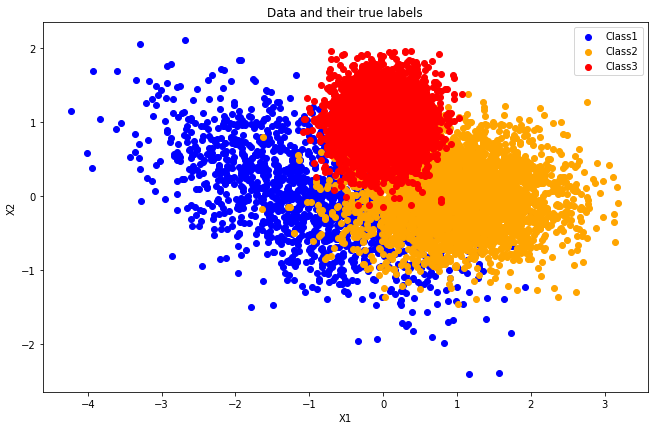

In [259]:
plt.axes([1,1,1.4,1.4])
plt.scatter(class1[0,:], class1[1,:], marker = 'o', c = 'blue')
plt.scatter(class2[0,:], class2[1,:], marker = 'o', c = 'orange')
plt.scatter(class3[0,:], class3[1,:], marker = 'o', c = 'red')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data and their true labels')
plt.legend(('Class1', 'Class2', 'Class3'))
plt.gca().set_aspect('equal', adjustable='box')

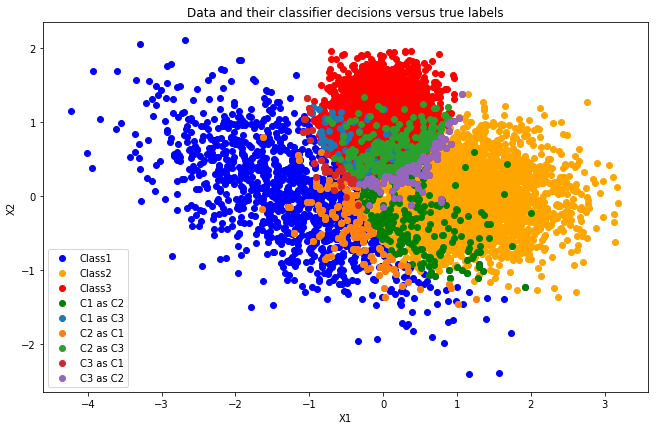

In [260]:
plt.axes([1,1,1.4,1.4])
plt.scatter(class1[0,:], class1[1,:], marker = 'o', c = 'blue')
plt.scatter(class2[0,:], class2[1,:], marker = 'o', c = 'orange')
plt.scatter(class3[0,:], class3[1,:], marker = 'o', c = 'red')
plt.scatter(class1[0,c21], class1[1,c21], marker = 'o', c = 'green')
plt.scatter(class1[0,c31], class1[1,c31], marker = 'o')
plt.scatter(class2[0,c12], class2[1,c12], marker = 'o')
plt.scatter(class2[0,c32], class2[1,c32], marker = 'o')
plt.scatter(class3[0,c13], class3[1,c13], marker = 'o')
plt.scatter(class3[0,c23], class3[1,c23], marker = 'o')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data and their classifier decisions versus true labels')
plt.legend(('Class1', 'Class2', 'Class3', 'C1 as C2', 'C1 as C3', 'C2 as C1', 'C2 as C3', 'C3 as C1', 'C3 as C2'))
plt.gca().set_aspect('equal', 'box')

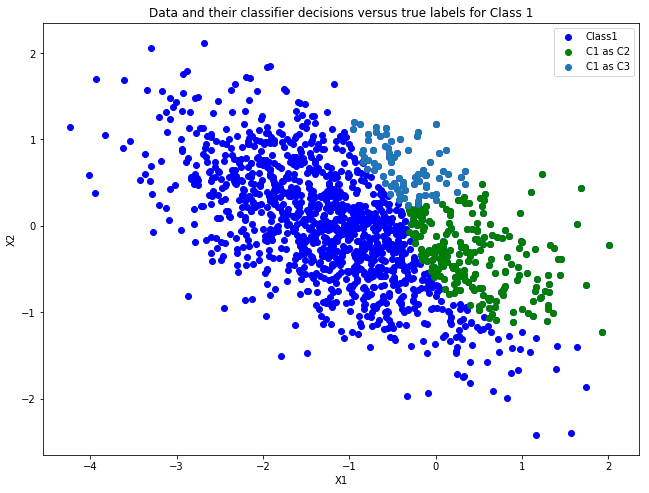

In [265]:
plt.axes([1,1,1.5,1.5])
plt.scatter(class1[0,:], class1[1,:], marker = 'o', c = 'blue')
plt.scatter(class1[0,c21], class1[1,c21], marker = 'o', c = 'green')
plt.scatter(class1[0,c31], class1[1,c31], marker = 'o')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data and their classifier decisions versus true labels for Class 1')
plt.legend(('Class1', 'C1 as C2', 'C1 as C3'))
plt.gca().set_aspect('equal')

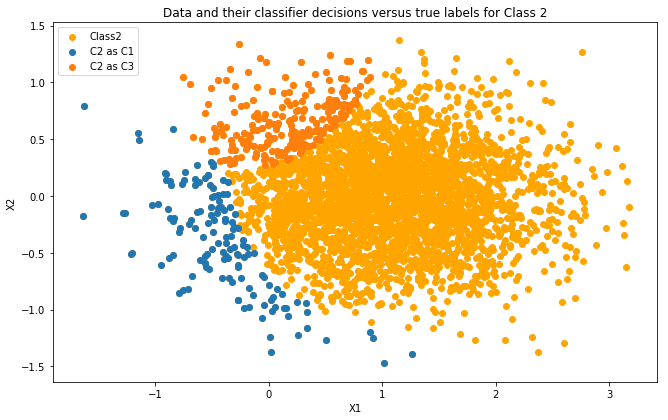

In [262]:
plt.axes([1,1,1.4,1.4])
plt.scatter(class2[0,:], class2[1,:], marker = 'o', c = 'orange')
plt.scatter(class2[0,c12], class2[1,c12], marker = 'o')
plt.scatter(class2[0,c32], class2[1,c32], marker = 'o')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data and their classifier decisions versus true labels for Class 2')
plt.legend(('Class2', 'C2 as C1', 'C2 as C3'))
plt.gca().set_aspect('equal')

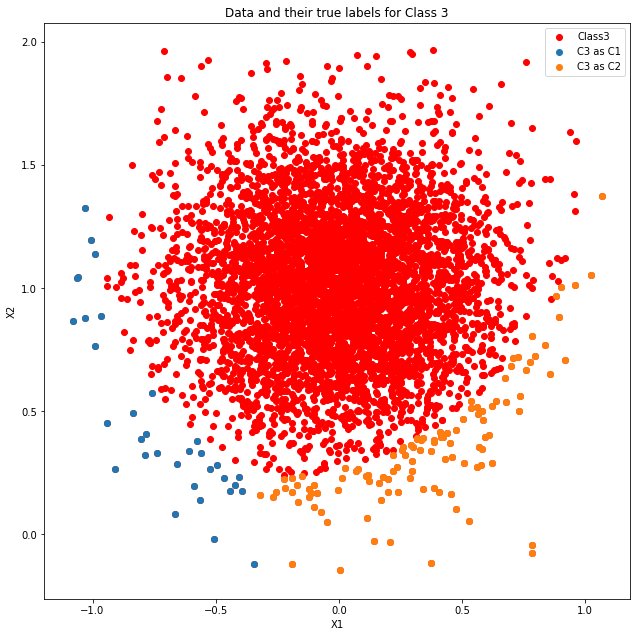

In [263]:
plt.axes([1,1,2,2])
plt.scatter(class3[0,:], class3[1,:], marker = 'o', c = 'red')
plt.scatter(class3[0,c13], class3[1,c13], marker = 'o')
plt.scatter(class3[0,c23], class3[1,c23], marker = 'o')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data and their true labels for Class 3')
plt.legend(('Class3', 'C3 as C1', 'C3 as C2'))
plt.gca().set_aspect('equal', 'box')

##Answer 2

####Code

In [0]:
sigma_x = 0.25
sigma_y = 0.25
xt = 0.2
yt = 0.3

# Create a mesh grid for plotting the countors
X, Y = np.meshgrid(np.arange(-2,2.1,0.1), np.arange(-2,2.1,0.1))
X = X.ravel()
Y = Y.ravel()

In [0]:
def calculate(k):

  n = np.ones(k)*-3
  d = np.zeros(k)
  r = np.zeros(k)
  # Generating k equally spaced points on the circumference of the circle
  x = [np.cos(2*np.pi*i/k) for i in range(k)]
  y = [np.sin(2*np.pi*i/k) for i in range(k)]

  # Calculate the ri values (range measurements)
  for i in range(k):
    while (n[i] < 0): # Make sure all the noise values are positive
      n[i] = np.random.normal(0,0.3**2) 
    d[i] = np.sqrt((x[i] - xt)**2 + (y[i] - yt)**2) # Calculating 
    r[i] = d[i] + n[i]
  
  X, Y = np.meshgrid(np.arange(-2,2.1,0.1), np.arange(-2,2.1,0.1))
  X = X.ravel()
  Y = Y.ravel()
  Z = np.zeros(X.shape[0])

  second_term = ((X**2/sigma_x**2) + (Y**2/sigma_y**2))/2 # Prior term
  first_term = np.zeros(X.shape[0]) # Likelihood term
  for i in range(k):
    first_term += (r[i] - np.sqrt((x[i] - X)**2 + (y[i] - Y)**2))**2

  Z = (first_term/(2*0.3**2) + second_term)
  return (Z, x, y)

####Plots

#####For k = 1

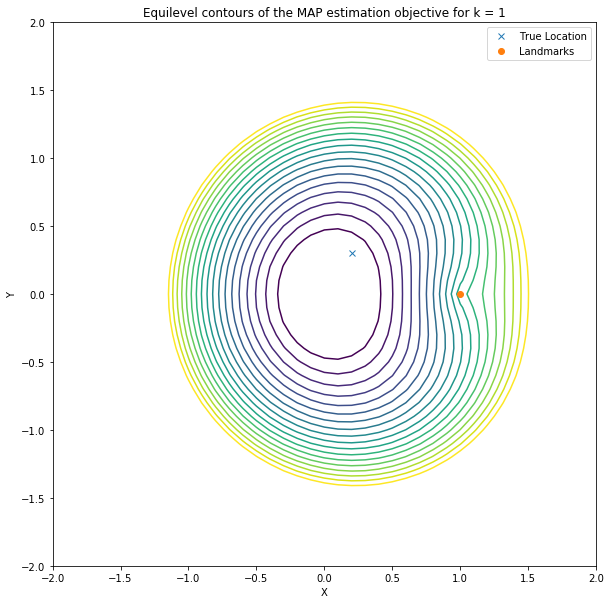

In [52]:
Z, x, y = calculate(1)
fig, ax1 = plt.subplots(figsize=(10, 10))
ax1.plot(xt,yt, 'x')
for i in range(1):
  ax1.plot(x[i], y[i], 'o')
CS = ax1.contour(X.reshape(41,41), Y.reshape(41,41), Z.reshape(41,41),levels=[i for i in range(2,20)])
ax1.set_aspect('equal', adjustable='box')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Equilevel contours of the MAP estimation objective for k = 1')
ax1.legend(('True Location', 'Landmarks'))

##### For k = 2

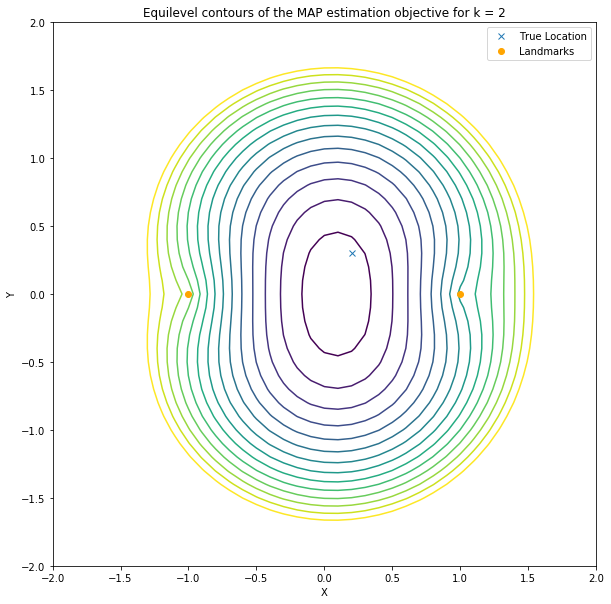

In [53]:
Z, x, y = calculate(2)
fig, ax1 = plt.subplots(figsize=(10, 10))
ax1.plot(xt,yt, 'x')
for i in range(2):
  ax1.plot(x[i], y[i], 'o', color = 'orange')
CS = ax1.contour(X.reshape(41,41), Y.reshape(41,41), Z.reshape(41,41),levels=[i for i in range(2,30,2)])
ax1.set_aspect('equal', adjustable='box')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Equilevel contours of the MAP estimation objective for k = 2')
ax1.legend(('True Location', 'Landmarks'))

##### For k = 3

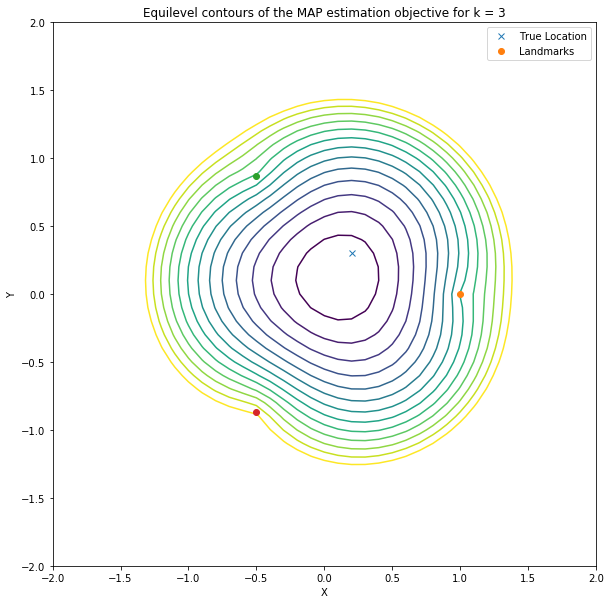

In [54]:
Z, x, y = calculate(3)
fig, ax1 = plt.subplots(figsize=(10, 10))
ax1.plot(xt,yt, 'x')
for i in range(3):
  ax1.plot(x[i], y[i], 'o')
CS = ax1.contour(X.reshape(41,41), Y.reshape(41,41), Z.reshape(41,41),levels=[i for i in range(2,27,2)])
ax1.set_aspect('equal', adjustable='box')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Equilevel contours of the MAP estimation objective for k = 3')
ax1.legend(('True Location', 'Landmarks'))

##### For k = 4

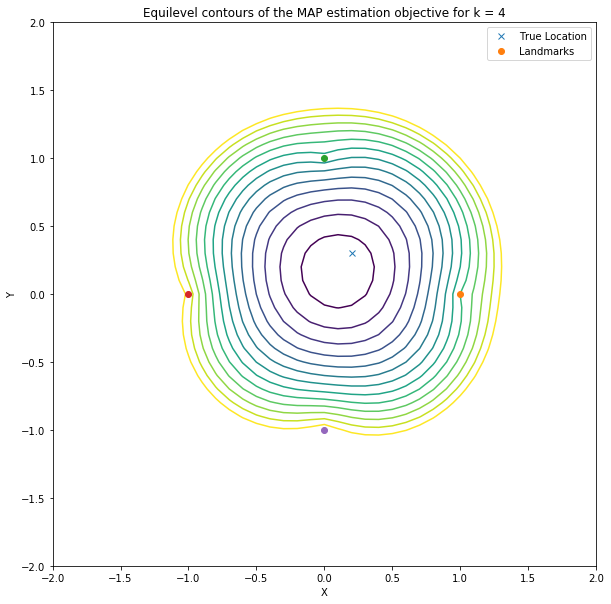

In [55]:
Z, x, y = calculate(4)
fig, ax1 = plt.subplots(figsize=(10, 10))
ax1.plot(xt,yt, 'x')
for i in range(4):
  ax1.plot(x[i], y[i], 'o')
CS = ax1.contour(X.reshape(41,41), Y.reshape(41,41), Z.reshape(41,41),levels=[i for i in range(2,27,2)])
ax1.set_aspect('equal', adjustable='box')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Equilevel contours of the MAP estimation objective for k = 4')
ax1.legend(('True Location', 'Landmarks'))

##Answer 3

In [0]:
N = 10
sigma = 0.3
w_true = np.array([2, -1, -2, 1]).reshape(4,1)
gamma_pows = [-5, -4, -3, -2, -1, 0, 1, 2, 3]

In [0]:
main = [] #MAP
main2 = [] # MLE
for i in gamma_pows:
  inn = []
  inn2 = [] # MLE
  for j in range(300):
    gamma_square = 10**(i)
    w_est = np.random.multivariate_normal([0,0,0,0], gamma_square*np.identity(4)).reshape(4,1)
    x = np.random.uniform(-1, 1, N)
    X = np.array([x**3, x**2, x, N*[1]])
    v = np.random.normal(0, sigma**2, 10).reshape(10,1)
    Y = (w_true.T@X).reshape(10,1) + v
    w_map = np.linalg.inv(X@X.T + (sigma**2/gamma_square)*np.identity(4))@(X@Y)
    w_mle = np.linalg.inv(X@X.T)@(X@Y) # MLE
    inn.append((np.sum((w_map - w_true)**2)))
    inn2.append((np.sum((w_mle - w_true)**2))) # MLE
  main.append(inn)
  main2.append(inn2) # MLE

In [0]:
stats_min = np.array([min(avg) for avg in main])
stats_25 = np.array([sorted(avg)[75] for avg in main])
stats_50 = np.array([sorted(avg)[150] for avg in main])
stats_75 = np.array([sorted(avg)[225] for avg in main])
stats_max = np.array([max(avg) for avg in main])

stats_min2 = np.array([min(avg) for avg in main2])
stats_252 = np.array([sorted(avg)[75] for avg in main2])
stats_502 = np.array([sorted(avg)[150] for avg in main2])
stats_752 = np.array([sorted(avg)[225] for avg in main2])
stats_max2 = np.array([max(avg) for avg in main2])

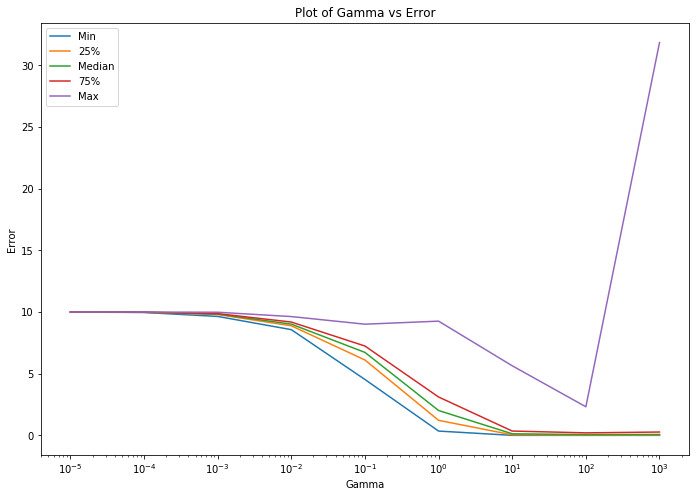

In [101]:
plt.axes([1,1,1.5,1.5])
plt.xscale('log')
plt.plot([10**(i) for i in gamma_pows], stats_min)
plt.plot([10**(i) for i in gamma_pows], stats_25)
plt.plot([10**(i) for i in gamma_pows], stats_50)
plt.plot([10**(i) for i in gamma_pows], stats_75)
plt.plot([10**(i) for i in gamma_pows], stats_max)
plt.xlabel('Gamma')
plt.ylabel('Error')
plt.title('Plot of Gamma vs Error')
plt.legend(('Min', '25%', 'Median', '75%', 'Max'))

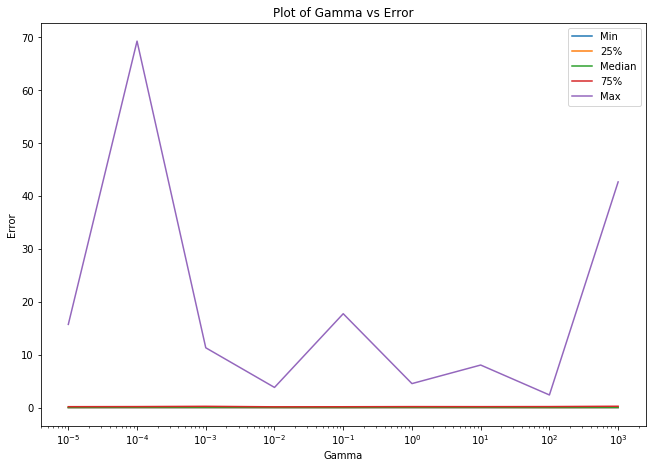

In [97]:
plt.axes([1,1,1.4,1.4])
plt.xscale('log')
plt.plot([10**(i) for i in gamma_pows], stats_min2)
plt.plot([10**(i) for i in gamma_pows], stats_252)
plt.plot([10**(i) for i in gamma_pows], stats_502)
plt.plot([10**(i) for i in gamma_pows], stats_752)
plt.plot([10**(i) for i in gamma_pows], stats_max2)
plt.xlabel('Gamma')
plt.ylabel('Error')
plt.title('Plot of Gamma vs Error')
plt.legend(('Min', '25%', 'Median', '75%', 'Max'))

In [92]:
for i in range(len(gamma_pows)):
  print('For gamma 10^{} the min value is: {}'.format(gamma_pows[i], stats_min[i]))
  
print('')
for i in range(len(gamma_pows)):
  print('For gamma 10^{} the 25th percentile value is: {}'.format(gamma_pows[i], stats_25[i]))
print('')  
for i in range(len(gamma_pows)):
  print('For gamma 10^{} the median value is: {}'.format(gamma_pows[i], stats_50[i]))
print('')  
for i in range(len(gamma_pows)):
  print('For gamma 10^{} the 75th percentile value is: {}'.format(gamma_pows[i], stats_75[i]))
print('')  
for i in range(len(gamma_pows)):
  print('For gamma 10^{} the max value is: {}'.format(gamma_pows[i], stats_max[i]))

For gamma 10^-5 the min value is: 9.996179514950017
For gamma 10^-4 the min value is: 9.963304484972005
For gamma 10^-3 the min value is: 9.642326265175202
For gamma 10^-2 the min value is: 8.570606829695963
For gamma 10^-1 the min value is: 4.530838722415179
For gamma 10^0 the min value is: 0.3476408545817302
For gamma 10^1 the min value is: 0.0016227213597400326
For gamma 10^2 the min value is: 0.00034090852477901534
For gamma 10^3 the min value is: 0.0017764298070201707

For gamma 10^-5 the 25th percentile value is: 9.997781699481193
For gamma 10^-4 the 25th percentile value is: 9.977262192282884
For gamma 10^-3 the 25th percentile value is: 9.797934101434173
For gamma 10^-2 the 25th percentile value is: 8.883372549942509
For gamma 10^-1 the 25th percentile value is: 6.111313174075538
For gamma 10^0 the 25th percentile value is: 1.2183706907762513
For gamma 10^1 the 25th percentile value is: 0.04362154938594307
For gamma 10^2 the 25th percentile value is: 0.020923742034480764
For ga